In [1]:
%config InlineBackend.rc = {"figure.dpi": 72, 'figure.figsize': (6.0, 4.0)}
%matplotlib inline

import abtem
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from ase.build import graphene
from gpaw import GPAW

abtem.config.set({"local_diagnostics.progress_bar": False});

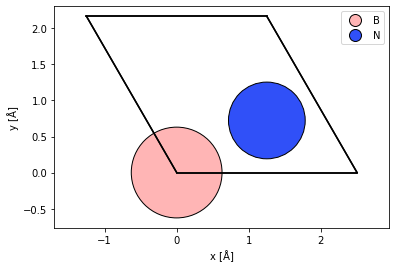

In [2]:
atoms = graphene(vacuum=3, a=2.504)

atoms[0].number = 5
atoms[1].number = 7

abtem.show_atoms(atoms, legend=True);

In [3]:
gpaw = GPAW(txt=None, kpts=(5, 5, 1))
atoms.calc = gpaw

In [4]:
atoms.get_potential_energy()

-19.369576502082047

In [13]:
from ase.io import write

write("traj.traj", [atoms] * 2)

In [5]:
gpaw.write("test.gpw")

In [27]:
from ase.io import read

t = read("traj.traj@:")

t

[Atoms(symbols='BN', pbc=[True, True, False], cell=[[2.504, 0.0, 0.0], [-1.252, 2.168527611076234, 0.0], [0.0, -0.0, 6.0]], calculator=SinglePointCalculator(...)),
 Atoms(symbols='BN', pbc=[True, True, False], cell=[[2.504, 0.0, 0.0], [-1.252, 2.168527611076234, 0.0], [0.0, -0.0, 6.0]], calculator=SinglePointCalculator(...))]

In [33]:
#potential_dft = abtem.GPAWPotential(["test1.gpw", "test2.gpw"], sampling=0.04)
potential_iam = abtem.Potential("traj.traj", sampling=0.04)

potential_iam.shape

(2, 6, 63, 109)

In [12]:


potential_dft.array.shape

(4, 6, 63, 109)